Exploratory data analysis is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate or not.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("matches.csv")

In [4]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [5]:
data.shape

(636, 18)

In [6]:
data.info

<bound method DataFrame.info of       id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers B

In [7]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [9]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [10]:
data["id"].count()

636

In [11]:
data["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

which ipl team won by scoring the maximum runs?

In [12]:
data.iloc[data["win_by_runs"].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

which ipl team won by consuming maximum wickets

In [13]:
data.iloc[data["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

which ipl team won by taking minimum wickets

In [14]:
data.iloc[data["win_by_wickets"].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

which season consisted of the highest number of matches ever played

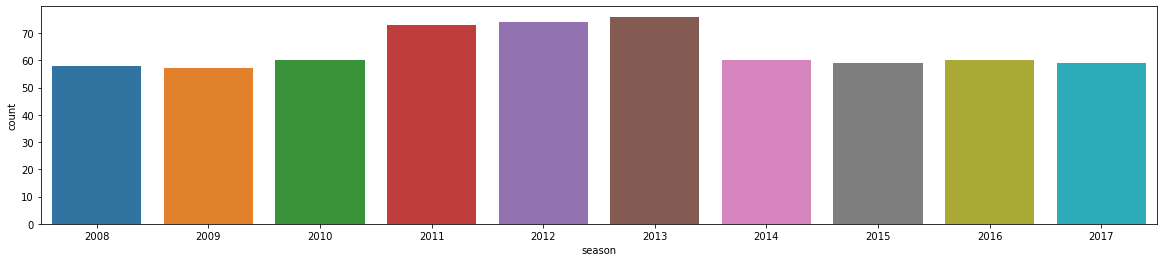

In [15]:
fig_dims=(20,4)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(x="season",ax=ax,data=data);

which is the most sucessfull ipl team with all the data at hand?

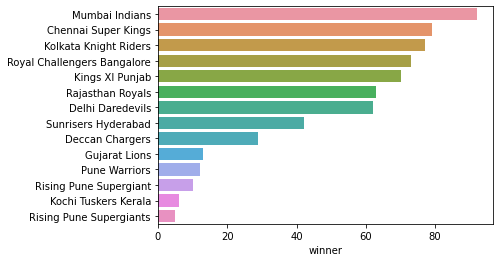

In [16]:
data1=data.winner.value_counts()
sns.barplot(y=data1.index,x=data1);

what is the probability of winning a match if the toss was won?

In [17]:
prob_of_won=data["toss_winner"]==data["winner"]
prob_of_won.groupby(prob_of_won).size()

False    311
True     325
dtype: int64

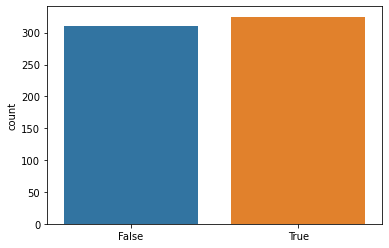

In [18]:
sns.countplot(prob_of_won);

In [19]:
pd.set_option('max_rows',99999)
pd.set_option('max_colwidth',400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


highest wins by teams per season

In [20]:
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [21]:
data["toss_decision"].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

man of the match -highest to lowest(in won matches)

In [22]:
data["player_of_match"].value_counts()

CH Gayle             18
YK Pathan            16
DA Warner            15
AB de Villiers       15
RG Sharma            14
SK Raina             14
MS Dhoni             13
G Gambhir            13
AM Rahane            12
MEK Hussey           12
V Sehwag             11
DR Smith             11
V Kohli              11
SR Watson            10
JH Kallis            10
A Mishra              9
KA Pollard            9
SE Marsh              9
SR Tendulkar          8
RV Uthappa            7
AT Rayudu             7
RA Jadeja             7
AC Gilchrist          7
AD Russell            6
A Nehra               6
Harbhajan Singh       6
BJ Hodge              6
M Vijay               6
UT Yadav              6
SP Narine             6
JP Faulkner           5
DPMD Jayawardene      5
SC Ganguly            5
GJ Maxwell            5
KC Sangakkara         5
SL Malinga            5
BB McCullum           5
Yuvraj Singh          5
B Kumar               5
DW Steyn              5
Sandeep Sharma        5
AJ Finch        

in which city were the number of matches played?

In [23]:
data["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

# data visuliation

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [25]:
fmri=sns.load_dataset("fmri")

In [26]:
fmri.sample(5)

,subject,timepoint,event,region,signal
431,s12,11,stim,frontal,-0.035377
813,s6,14,cue,parietal,-0.014262
349,s0,6,stim,frontal,0.059436
841,s13,15,cue,parietal,-0.001390
1,s5,14,stim,parietal,-0.080883


In [27]:
fmri=pd.DataFrame(fmri)

line plot with timepoint and signal 

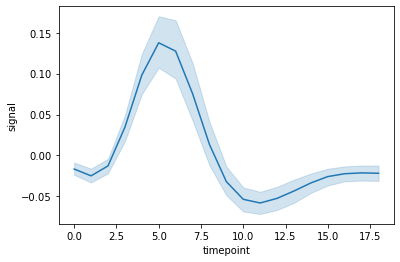

In [28]:
sns.lineplot(x=fmri["timepoint"],y=fmri["signal"])
plt.show()

# Dibetes Detection using MULTIVATIARE ANALYSIS and machine learning

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

About this file
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [30]:
data=pd.read_csv("diabetes.csv")

In [31]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
197,3,107,62,13,48,22.9,0.678,23,1
72,13,126,90,0,0,43.4,0.583,42,1
365,5,99,54,28,83,34.0,0.499,30,0
350,4,92,80,0,0,42.2,0.237,29,0
19,1,115,70,30,96,34.6,0.529,32,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.isna().any() # all the columns have numerical values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

understanding corellation between the labels

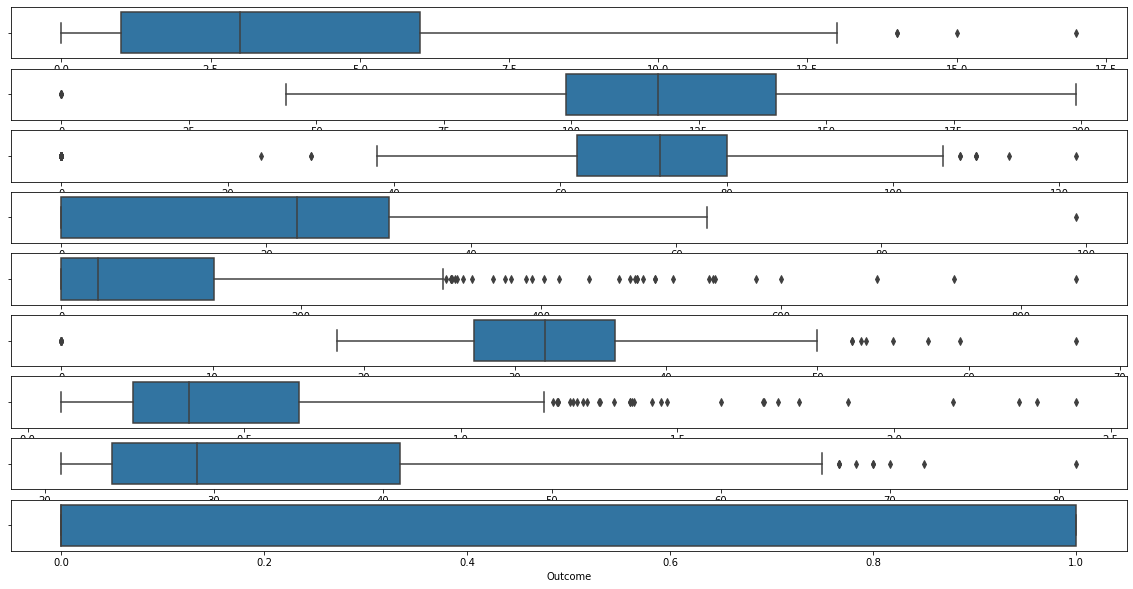

In [35]:
fig,axs=plt.subplots(9,figsize=(20,10))
plt1=sns.boxplot(data['Pregnancies'],ax=axs[0])
plt1=sns.boxplot(data['Glucose'],ax=axs[1])
plt1=sns.boxplot(data['BloodPressure'],ax=axs[2])
plt1=sns.boxplot(data['SkinThickness'],ax=axs[3])
plt1=sns.boxplot(data['Insulin'],ax=axs[4])
plt1=sns.boxplot(data['BMI'],ax=axs[5])
plt1=sns.boxplot(data['DiabetesPedigreeFunction'],ax=axs[6])
plt1=sns.boxplot(data['Age'],ax=axs[7])
plt1=sns.boxplot(data['Outcome'],ax=axs[8])

In [36]:
upper_fence_Pregnancies=data["Pregnancies"].quantile(0.97)
print(upper_fence_Pregnancies)
lower_fence_Pregnancies=data["Pregnancies"].quantile(0.05)
print(lower_fence_Pregnancies)

11.0
0.0


In [37]:
upper_fence_Glucose=data["Glucose"].quantile(0.94)
print(upper_fence_Glucose)
lower_fence_Glucose=data["Glucose"].quantile(0.01)
print(lower_fence_Glucose)

179.0
57.0


In [38]:
upper_fence_BloodPressure=data["BloodPressure"].quantile(0.97)
print(upper_fence_BloodPressure)
lower_fence_BloodPressure=data["BloodPressure"].quantile(0.05)
print(lower_fence_BloodPressure)

94.99000000000001
38.7


In [39]:
upper_fence_SkinThickness=data["SkinThickness"].quantile(0.99)
print(upper_fence_SkinThickness)
lower_fence_SkinThickness=data["SkinThickness"].quantile(0.01)
print(lower_fence_SkinThickness)

51.33000000000004
0.0


In [40]:
upper_fence_Insulin=data["Insulin"].quantile(0.95)
print(upper_fence_Insulin)
lower_fence_Insulin=data["Insulin"].quantile(0.01)
print(lower_fence_Insulin)

293.0
0.0


In [41]:
upper_fence_BMI=data["BMI"].quantile(0.95)
print(upper_fence_BMI)
lower_fence_BMI=data["BMI"].quantile(0.01)
print(lower_fence_BMI)

44.394999999999996
0.0


In [42]:
upper_fence_DiabetesPedigreeFunction=data["DiabetesPedigreeFunction"].quantile(0.95)
print(upper_fence_DiabetesPedigreeFunction)
lower_fence_DiabetesPedigreeFunction=data["DiabetesPedigreeFunction"].quantile(0.01)
print(lower_fence_DiabetesPedigreeFunction)

1.1328499999999997
0.09468


In [43]:
upper_fence_Age=data["Age"].quantile(0.90)
print(upper_fence_Age)
lower_fence_Age=data["Age"].quantile(0.001)
print(lower_fence_Age)

51.0
21.0


removing the outliers

In [44]:
data1=data[(data["Pregnancies"]<upper_fence_Pregnancies) & (data["Pregnancies"]>lower_fence_Pregnancies)]
data2=data1[(data1["Glucose"]<upper_fence_Glucose) & (data1["Glucose"]>lower_fence_Glucose)]
data3=data2[(data2["BloodPressure"]<upper_fence_BloodPressure) & (data2["BloodPressure"]>lower_fence_BloodPressure)]
data4=data3[(data3["SkinThickness"]<upper_fence_SkinThickness) & (data3["SkinThickness"]>lower_fence_SkinThickness)]
data5=data4[(data4["Insulin"]<upper_fence_Insulin) & (data4["Insulin"]>lower_fence_Insulin)]
data6=data5[(data5["BMI"]<upper_fence_BMI) & (data5["BMI"]>lower_fence_BMI)]
data7=data6[(data6["DiabetesPedigreeFunction"]<upper_fence_DiabetesPedigreeFunction) & (data6["DiabetesPedigreeFunction"]>lower_fence_DiabetesPedigreeFunction)]
data8=data7[(data7["Age"]<upper_fence_Age) & (data7["Age"]>lower_fence_Age)]

In [45]:
data8.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,3.265700,113.666667,68.705314,27.125604,114.797101,30.982609,0.453889,29.077295,0.227053
std,2.321686,24.383067,10.400482,10.005031,57.527515,5.482991,0.230366,6.870071,0.419943
min,1.000000,68.000000,44.000000,10.000000,15.000000,19.300000,0.101000,22.000000,0.000000
25%,1.000000,96.000000,61.000000,19.000000,71.000000,26.600000,0.261500,24.000000,0.000000
50%,3.000000,110.000000,70.000000,27.000000,105.000000,31.600000,0.422000,27.000000,0.000000
75%,4.500000,128.000000,76.000000,33.000000,156.000000,34.750000,0.627500,33.000000,0.000000
max,10.000000,174.000000,92.000000,50.000000,284.000000,43.500000,1.057000,50.000000,1.000000


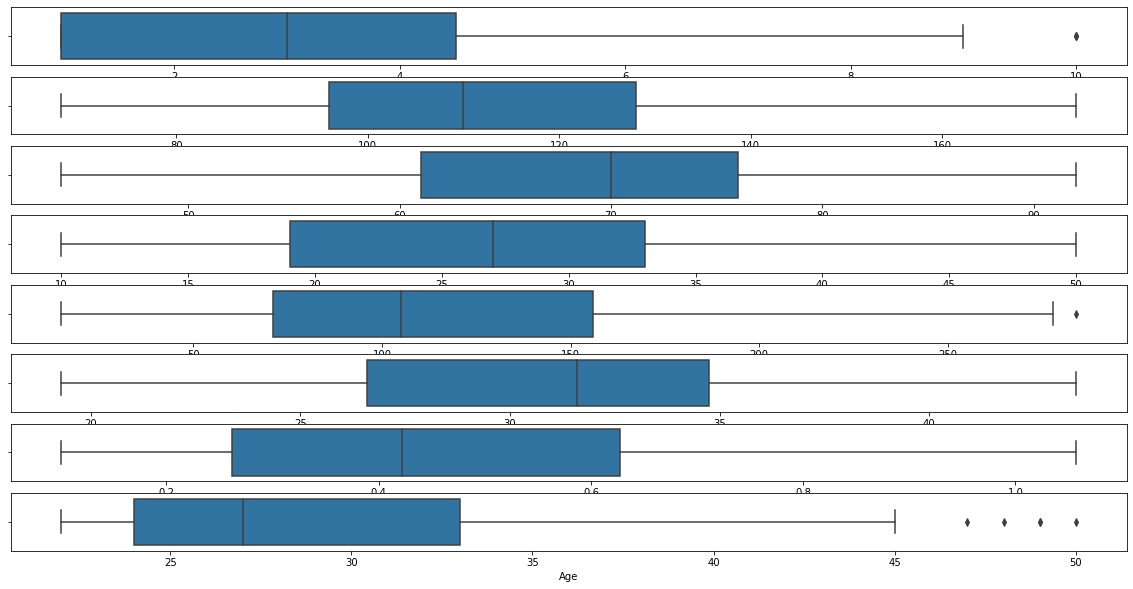

In [46]:
fig,axs=plt.subplots(8,figsize=(20,10))
plt1=sns.boxplot(data8['Pregnancies'],ax=axs[0])
plt1=sns.boxplot(data8['Glucose'],ax=axs[1])
plt1=sns.boxplot(data8['BloodPressure'],ax=axs[2])
plt1=sns.boxplot(data8['SkinThickness'],ax=axs[3])
plt1=sns.boxplot(data8['Insulin'],ax=axs[4])
plt1=sns.boxplot(data8['BMI'],ax=axs[5])
plt1=sns.boxplot(data8['DiabetesPedigreeFunction'],ax=axs[6])
plt1=sns.boxplot(data8['Age'],ax=axs[7])

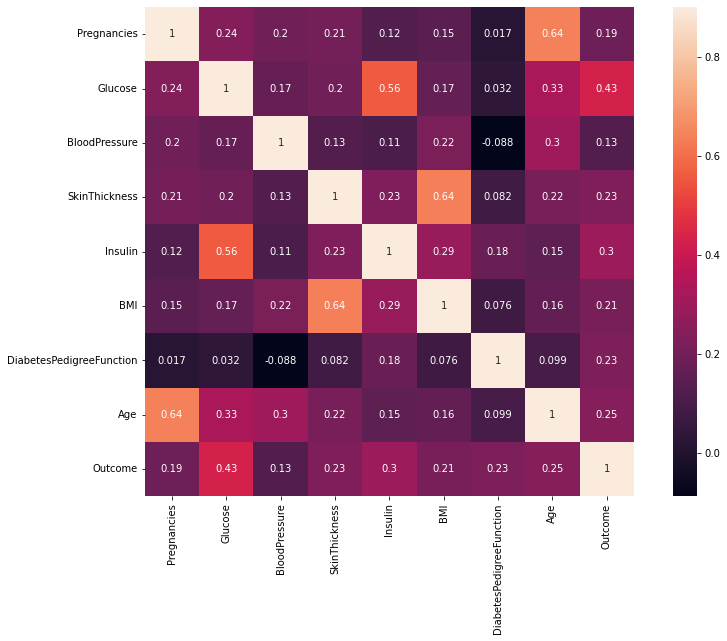

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.240561       0.201280       0.207957   
Glucose                      0.240561  1.000000       0.173498       0.196414   
BloodPressure                0.201280  0.173498       1.000000       0.125989   
SkinThickness                0.207957  0.196414       0.125989       1.000000   
Insulin                      0.122673  0.556795       0.108554       0.231248   
BMI                          0.146227  0.170458       0.223629       0.637278   
DiabetesPedigreeFunction     0.017491  0.032484      -0.088017       0.081574   
Age                          0.639051  0.328457       0.300270       0.215968   
Outcome                      0.191750  0.429835       0.127650       0.228877   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.122673  0.146227                  0.017491   
Glucose                   0.556795  0.170

In [47]:
correlation_metrices=data8.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrices,vmax=.9,square=True,annot=True)
plt.show()
print(correlation_metrices)

checking num of people have no diabetes

In [48]:
result=sorted(data8["Outcome"]).count(0)
print(result)

160


checking num of people have diabetes

In [49]:
result=sorted(data8["Outcome"]).count(1)
print(result)

47


printing count plot with seaborn

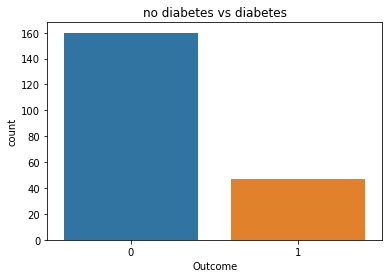

In [50]:
sns.countplot(x=data8.Outcome);
plt.title("no diabetes vs diabetes");

splitting the training and testing data

In [51]:
x=data8.drop(["Outcome"],axis=1) # drop the target variable
y=data8["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

using Logistic regression

In [52]:
l=LogisticRegression()
l.fit(xtrain,ytrain)

LogisticRegression()

In [53]:
y_pred=l.predict(xtest)

In [54]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

confusion metric

In [55]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[33  2]
 [ 6  1]]


finding the accuracy score

In [56]:
accuracy=l.score(xtest,ytest)
print("accuracy score of the LogisticRegression model is",accuracy*100,"%")

accuracy score of the LogisticRegression model is 80.95238095238095 %


# checking the accuracy with KNN

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [58]:
col=x.columns
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [59]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

xtrain=pd.DataFrame(xtrain,columns=col)
xtest=pd.DataFrame(xtest,columns=col)

In [60]:
xtrain,xtest,ytrain,ytest

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0       1.080460 -0.383924       0.104781       0.440736 -0.834751 -0.072817   
 1      -1.011980 -0.221182      -1.060763      -0.981193  0.031614 -0.497958   
 2       2.754412  0.592531       0.687553       0.034471  0.139909  0.869886   
 3      -0.175004  0.022932      -0.283733       1.151701  0.464796  1.276542   
 4      -1.011980  0.551845       1.853097       1.151701 -0.076682  0.980792   
 5       0.661972  0.470474       0.881810      -0.067095 -1.665018 -0.294630   
 6       0.243484  1.609671      -0.672248       0.339170  3.063891  0.296870   
 7      -1.011980 -1.360380       0.299039      -0.981193 -1.340131 -0.849161   
 8      -1.011980 -1.441751       1.076068      -0.270228 -1.394279 -1.070973   
 9      -0.175004  2.382698       0.881810       1.151701  1.277013  0.481714   
 10      1.498948  1.853785      -1.449277       0.440736  1.096520 -0.128270   
 11     -0.593492 -0.587353 

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=3)

In [63]:
knn_classifier.fit(xtrain,ytrain)

KNeighborsClassifier(p=3)

In [64]:
ypred=knn_classifier.predict(xtest);ypred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [65]:
accuracy1=l.score(xtest,ytest)
print("accuracy score of the LogisticRegression model is",accuracy1*100,"%")

accuracy score of the LogisticRegression model is 78.57142857142857 %
